In [24]:
# pip install tensorflow

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
# !pip install opencv-python
# !pip install librosa

In [27]:
image = cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg',cv2.IMREAD_GRAYSCALE)

In [28]:
image.shape

(1317, 1857)

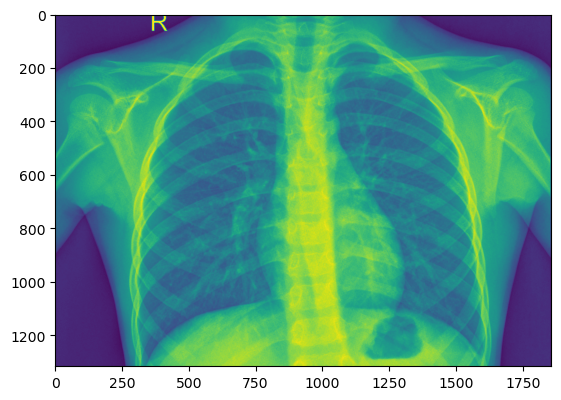

In [29]:
plt.imshow(image)

In [30]:
# ## import matplotlib.pyplot as plt
# import glob
# import librosa
# import numpy as np
# import cv2 
# train_normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg')
# train_neumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg')

In [31]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
train_normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/*.jpeg')
train_neumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/*.jpeg')

x_train = []
y_train = []

image_size=(224,224)

for i in train_normal:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_train.append(image)
    y_train.append(1)

for i in train_neumonia:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_train.append(image)
    y_train.append(0)
    


    
x_train=np.array(x_train)
y_train=np.array(y_train)
y_train.shape


(5216,)

In [32]:
test_normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/*.jpeg')
test_neumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/*.jpeg')

x_test = []
y_test = []

image_size=(224,224)

for i in test_normal:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_test.append(image)
    y_test.append(1)

for i in test_neumonia:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_test.append(image)
    y_test.append(0)
    


    
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test.shape


(624,)

In [33]:
val_normal = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/*.jpeg')
val_neumonia = glob.glob('/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/*.jpeg')

x_val = []
y_val = []

image_size=(224,224)

for i in val_normal:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_val.append(image)
    y_val.append(1)

for i in val_neumonia:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    x_val.append(image)
    y_val.append(0)
    


    
x_val = np.array(x_val)
y_val = np.array(y_val)
y_val.shape


(16,)

In [34]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(x_train, y_train,validation_data=(x_val,y_val),epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
163/163 [==============================] - 13s 73ms/step - loss: 414.4425 - accuracy: 0.8284 - val_loss: 130.1584 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 12s 74ms/step - loss: 79.9172 - accuracy: 0.9122 - val_loss: 585.6097 - val_accuracy: 0.6250
Epoch 3/10
163/163 [==============================] - 12s 73ms/step - loss: 65.2341 - accuracy: 0.9233 - val_loss: 14.5029 - val_accuracy: 0.9375
Epoch 4/10
163/163 [==============================] - 12s 75ms/step - loss: 109.6076 - accuracy: 0.8980 - val_loss: 61.4228 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 12s 71ms/step - loss: 54.3718 - accuracy: 0.9433 - val_loss: 53.6407 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 12s 72ms/step - loss: 59.1405 - accuracy: 0.9360 - val_loss: 143.3152 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 12s 76ms/step - loss: 84.4021 - accuracy: 0.9270 - val_loss: 78.8